# Live skin detector:

3 different approaches for data preprocessing and feature selection on two different datasets - 'archive2016 and archive' is performed using two different methods is implemented in following code:

# Contents:

1. Archive2016 data:
    * Import data
    * Visualize the data
    * Preprocessing of the data with MinMaxScaler and feature selection using PCA
    * Labeling and creation of dataset
    * visualization of new dataset
    * Training and Test data split
    * Training different classifiers
    
    
2. Archive data:
    * Import data
    * Visualize the data
    * Preprocessing of the data with MinMaxScaler and feature selection using f_classif and chi2 methods
    * Labeling and creation of dataset
    * visualization of new dataset
    * Training and Test data split
    * Training different classifiers
    
    
3. Archive2016 data with TSNE:
    * Import data
    * Preprocessing of the data with MinMaxScaler and feature selection using TSNE
    * Labeling and creation of dataset
    * visualization of new dataset
    * Training and Test data split
    * Training different classifiers


# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import time
from math import sqrt
import seaborn as sns
# Import necessary modules
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn import svm
from pandas.plotting import parallel_coordinates, scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.manifold import TSNE
from sklearn import preprocessing
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')

# Classifiers list

In [2]:
names = ["K Nearest Neighbors" , "Linear SVM", "RBF SVM", "MLP Net", "AdaBoost"]
#         "Gaussian Process",
#          "Decision Tree", "Random Forest", 
#          "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    svm.SVC(kernel='linear', gamma=0.3, C=2),
    svm.SVC(kernel='rbf', gamma=0.3, C=2),
    MLPClassifier(hidden_layer_sizes = (100,2),alpha=1, max_iter=1000),
    AdaBoostClassifier()]
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     GaussianNB()]

# Archive2016 data

In [3]:
'''Data input from archive2016 folder for training'''

data_skin_link = 'NN Spectral Estimation/Archiv2016/2016skin.csv'
data_skin = pd.read_csv(data_skin_link, sep=';', encoding='utf-8')
data_skin = data_skin.dropna()

fake_material_link = 'NN Spectral Estimation/Archiv2016/2016material-fake.csv'
data_fake_material = pd.read_csv(fake_material_link, sep=';', encoding='utf-8')
data_fake_material = data_fake_material.dropna()

material_link = 'NN Spectral Estimation/Archiv2016/2016material.csv'
data_material = pd.read_csv(material_link, sep=';', encoding='utf-8')
data_material = data_material.dropna()

Text(0.5, 0, 'Wavelength')

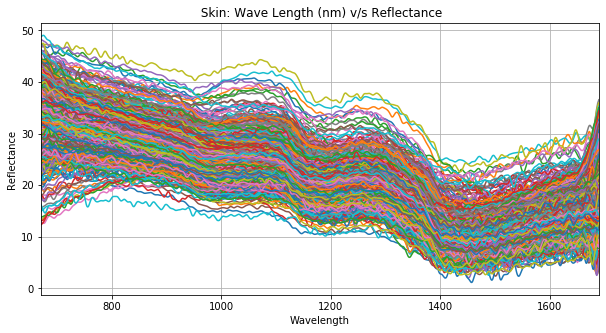

In [4]:
'''Visualization of input data skin'''
data_skin[:].plot(x='nm', y = data_skin.columns.drop('nm'), figsize=(10,5), grid=True,legend = False)
plt.title(" Skin: Wave Length (nm) v/s Reflectance")
plt.ylabel('Reflectance')
plt.xlabel('Wavelength')

Text(0.5, 0, 'Wavelength')

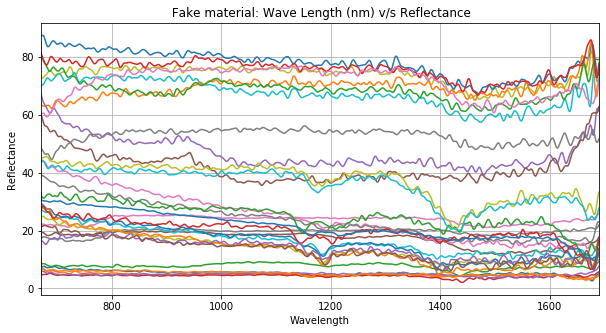

In [5]:
'''Visualization of input data fake material'''
data_fake_material[:].plot(x='nm', y = data_fake_material.columns.drop('nm'), figsize=(10,5), grid=True,legend = False)
plt.title(" Fake material: Wave Length (nm) v/s Reflectance")
plt.ylabel('Reflectance')
plt.xlabel('Wavelength')

Text(0.5, 0, 'Wavelength')

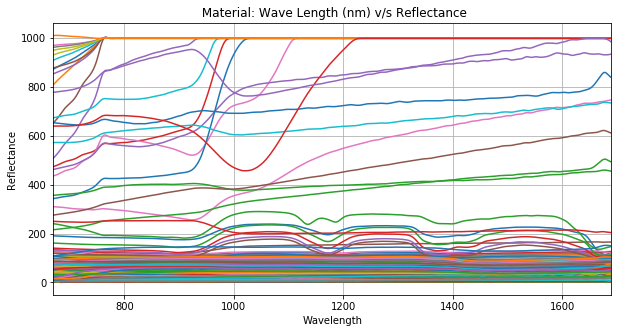

In [6]:
'''Visualization of input data material'''

data_material[:].plot(x='nm', y = data_material.columns.drop('nm'), figsize=(10,5), grid=True,legend = False)
plt.title(" Material: Wave Length (nm) v/s Reflectance")
plt.ylabel('Reflectance')
plt.xlabel('Wavelength')

In [7]:
'''Data preprocessing using sklearn - MinmaxScaler and feature selection using PCA'''

data_skin = data_skin.transpose()
data_skin.columns = data_skin.iloc[0]
data_skin = data_skin.drop(data_skin.index[0])
values1 = data_skin.values
min_max_scaler1 = preprocessing.MinMaxScaler()
values1_scaled = min_max_scaler1.fit_transform(values1)
data_skin = pd.DataFrame(values1_scaled)
print("shpae of skin data:",data_skin.shape)

data_fake_material = data_fake_material.transpose()
data_fake_material.columns = data_fake_material.iloc[0]
data_fake_material = data_fake_material.drop(data_fake_material.index[0])
values2 = data_fake_material.values
min_max_scaler2 = preprocessing.MinMaxScaler()
values2_scaled = min_max_scaler2.fit_transform(values2)
data_fake_material = pd.DataFrame(values2_scaled)
print("shape for fake material data:",data_fake_material.shape)

data_material = data_material.transpose()
data_material.columns = data_material.iloc[0]
data_material = data_material.drop(data_material.index[0])
values3 = data_material.values
min_max_scaler3 = preprocessing.MinMaxScaler()
values3_scaled = min_max_scaler3.fit_transform(values3)
data_material = pd.DataFrame(values3_scaled)
print("shape of material:",data_material.shape)

shpae of skin data: (1111, 1021)
shape for fake material data: (32, 1021)
shape of material: (335, 1021)


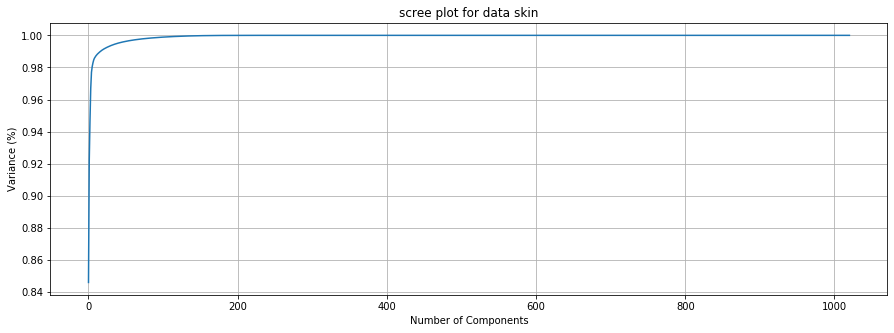

In [8]:
pcacheck = PCA().fit(data_skin)
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(pcacheck.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('scree plot for data skin')
plt.grid()
plt.show()

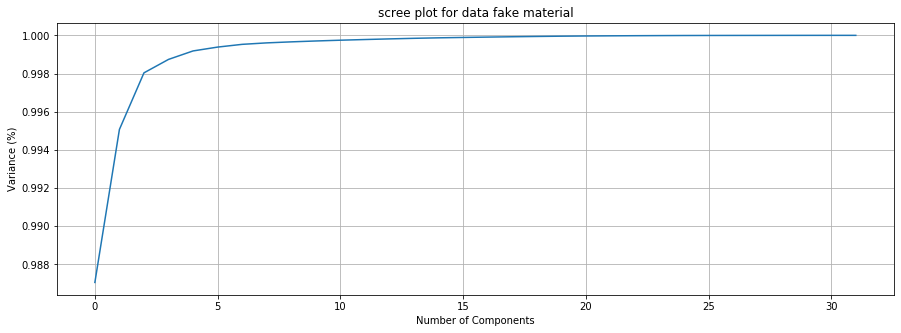

In [9]:
pcacheck1 = PCA().fit(data_fake_material)
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(pcacheck1.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('scree plot for data fake material')
plt.grid()
plt.show()

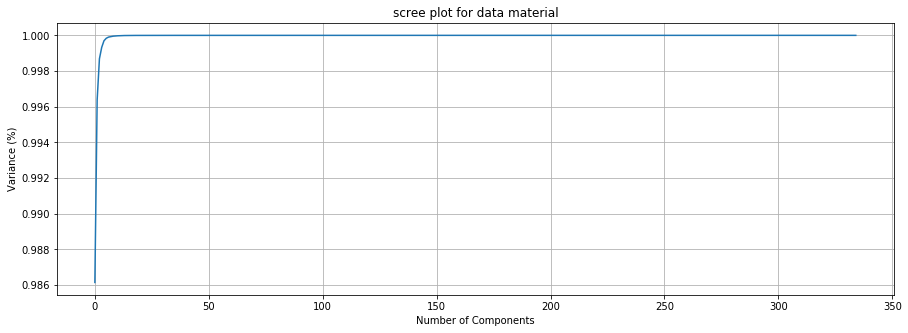

In [10]:
pcacheck2 = PCA().fit(data_material)
plt.figure(figsize=(15,5))
plt.plot(np.cumsum(pcacheck2.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('scree plot for data material')
plt.grid()
plt.show()

In [11]:
#PCA
pcax = PCA(n_components=15, whiten=True).fit(data_skin) #selecting best 15 features
x = pcax.transform(data_skin)
pcay = PCA(n_components=15, whiten=True).fit(data_fake_material) #selecting best 15 features
y = pcay.transform(data_fake_material)
pcaz = PCA(n_components=15, whiten=True).fit(data_material) #selecting best 15 features
z = pcaz.transform(data_material)
print("shape of skin data after feature selection:",x.shape)
print("shape of fake material data after feature selection:",y.shape)
print("shape of material data after feature selection:",z.shape)

shape of skin data after feature selection: (1111, 15)
shape of fake material data after feature selection: (32, 15)
shape of material data after feature selection: (335, 15)


In [12]:
'''Creating new dataframes with the selected features and the assigned labels
Here data of skin belongs to class 1 (label 1) and the rest of the data belongs to class 0 (label 0)'''

# column names - 15 best features - 15 wavelengths with most significant faetures.
col_names = ['nm1', 'nm2', 'nm3', 'nm4', 'nm5', 'nm6', 'nm7', 'nm8', 'nm9','nm10',
            'nm11', 'nm12', 'nm13', 'nm14', 'nm15']

# #creating dataframes with 15 significant features.
new_data_skin = pd.DataFrame(x, columns=col_names)
new_data_fm = pd.DataFrame(y, columns=col_names)
new_data_material = pd.DataFrame(z, columns=col_names)

#creating labels corresponding to the data
new_colx = np.ones((1111, 1),int)
new_coly = np.zeros((32, 1),int)
new_colz = np.zeros((335, 1),int)

#adding labels to the new dataframes.
new_data_skin = new_data_skin.copy()
new_data_skin['label'] = new_colx

new_data_fm = new_data_fm.copy()
new_data_fm['label'] = new_coly

new_data_material = new_data_material.copy()
new_data_material['label'] = new_colz

#Creating a new data frame for training and testing of the classifiers.
X_archive2016 = pd.concat((new_data_skin, new_data_fm, new_data_material), axis=0)
print("Shape of the dataframe:",X_archive2016.shape)
X_archive2016.head()

Shape of the dataframe: (1478, 16)


,nm1,nm2,nm3,nm4,nm5,nm6,nm7,nm8,nm9,nm10,nm11,nm12,nm13,nm14,nm15,label
0,-0.052609,1.168533,0.172672,0.138627,1.759401,0.065365,-0.781383,-0.550679,-0.929434,-0.564997,0.367421,-0.116978,-0.863625,0.594936,-0.293500,1
1,0.096374,-0.127435,-0.008714,0.106987,2.257299,0.775585,-0.491999,-1.168099,-0.649172,0.145689,-0.054202,-0.591565,-1.576601,1.126396,-1.251331,1
2,-0.602478,0.019255,-0.262681,-0.536894,0.723851,-0.298937,-0.272795,0.145551,-1.310092,0.647053,0.022145,-0.113106,-0.415788,-0.403539,-0.156740,1
3,-0.686054,0.292598,-0.095777,-0.510532,0.828468,-0.146340,-1.045973,0.223924,-0.877070,0.648363,0.108217,0.033461,0.037252,0.068156,0.292628,1
4,-1.020982,0.570110,0.109271,0.281044,1.751067,0.017664,-0.458511,-0.285268,-0.586949,-0.481734,0.321244,-0.084769,-0.739179,0.486085,-0.793031,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

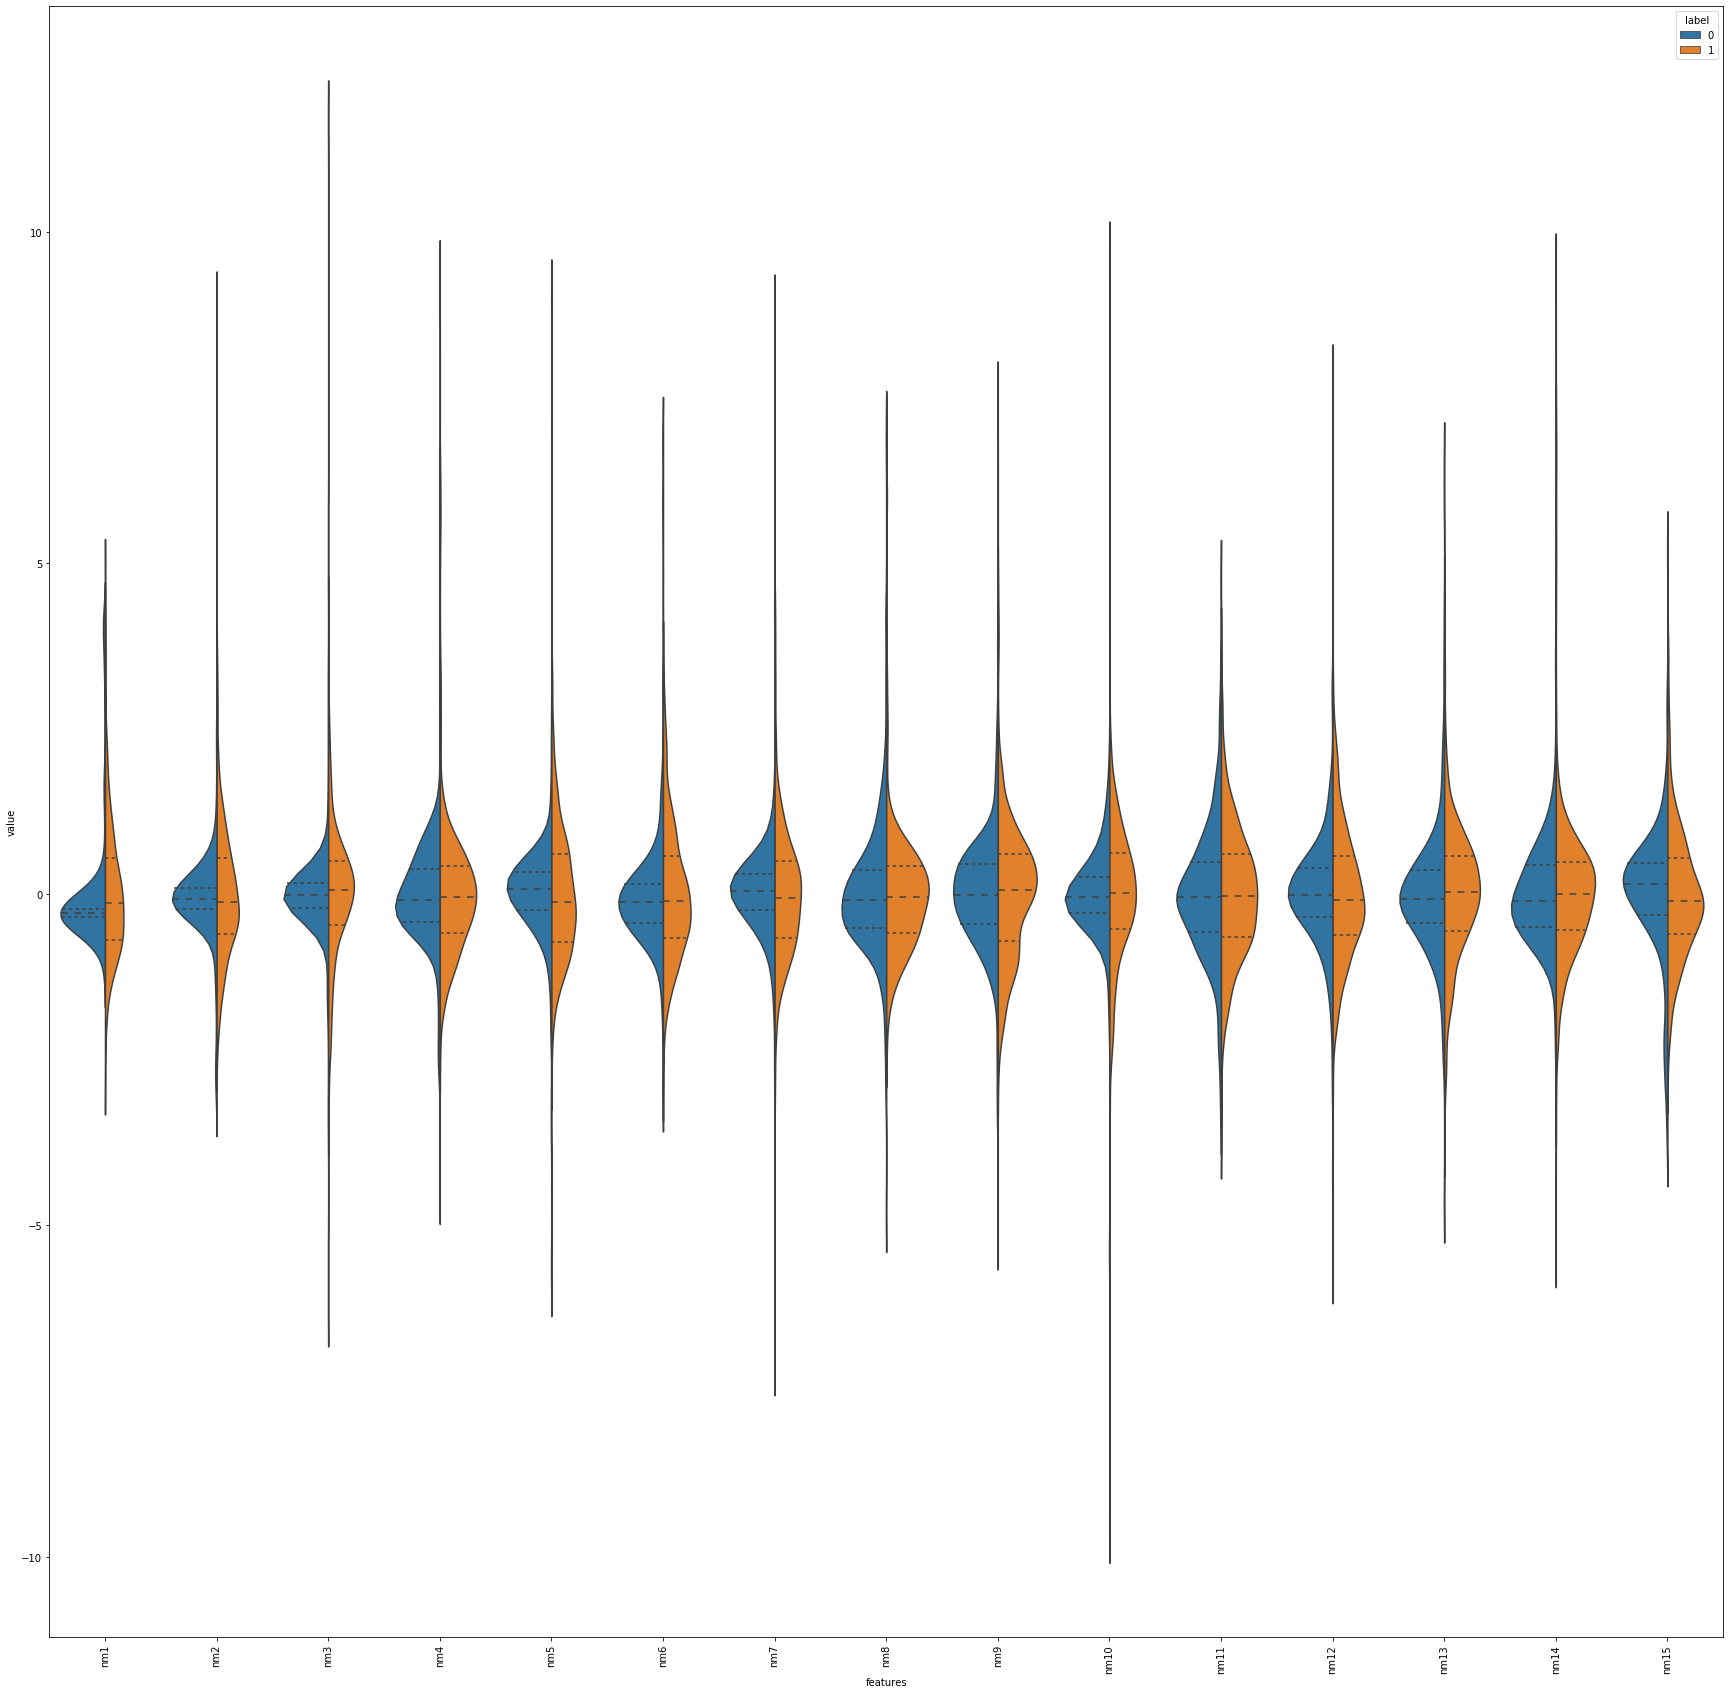

In [13]:
'''Visualization of the reduced dataframe'''

checky_1 = X_archive2016.label
checkx_1 = X_archive2016.drop(['label'], axis=1)
# sns.set(font_scale=3)
data_dia_1 = checky_1
data1_1 = checkx_1
data_n_2_1 = (data1_1 - data1_1.mean()) / (data1_1.std())              # standardization
data_n_2_1.head()
data1_1 = pd.concat([checky_1,data_n_2_1.iloc[:,0:30]],axis=1)
data1_1 = pd.melt(data1_1,id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(30,30))
sns.violinplot(x="features", y="value", hue="label", data=data1_1,split=True, inner="quart")
plt.xticks(rotation=90)

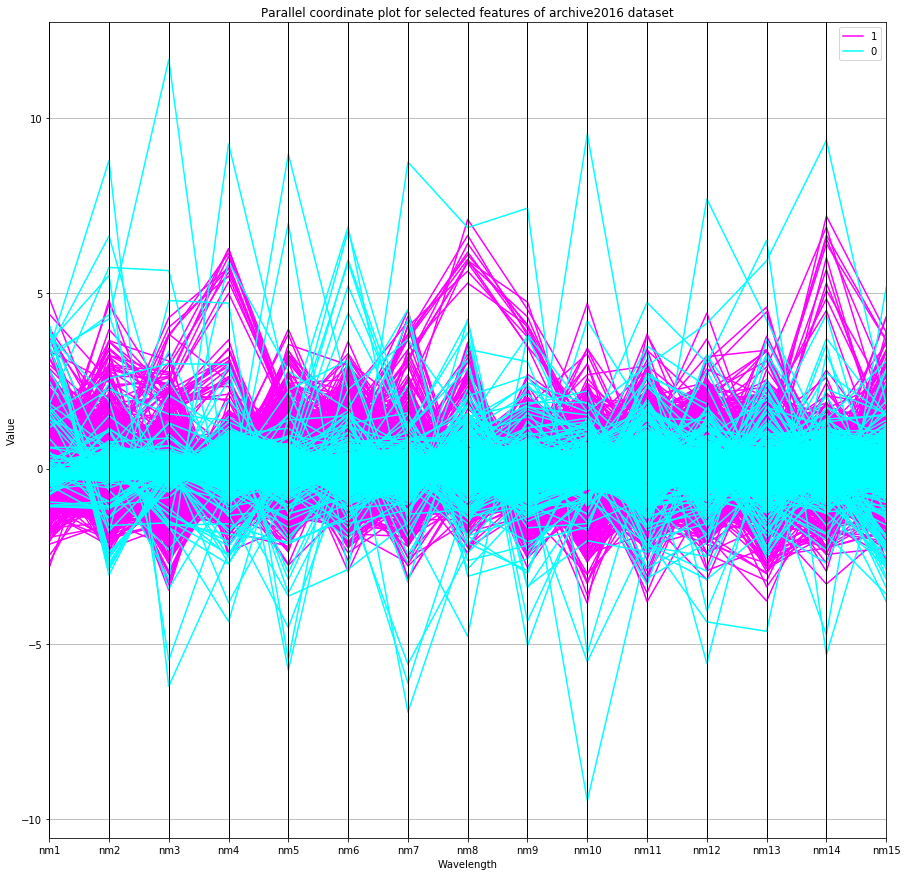

In [14]:
'''Visualization of the reduced dataframe - parallel plot'''

plt.figure(figsize=(15,15))
parallel_coordinates(X_archive2016,"label",color = ('magenta','cyan'))
plt.title("Parallel coordinate plot for selected features of archive2016 dataset")
plt.ylabel("Value")
plt.xlabel("Wavelength")
plt.show()

In [15]:
'''Creating training and testing data'''

target = X_archive2016['label'] #target labels
features = X_archive2016.drop('label', axis=1) #features for training

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state=1)
print("shape of training features:",x_train.shape)
print("shape of training labels:",y_train.shape)
print("shape of test features:",x_test.shape)
print("shape of test labels:",y_test.shape)

shape of training features: (1034, 15)
shape of training labels: (1034,)
shape of test features: (444, 15)
shape of test labels: (444,)


K Nearest Neighbors
accuracy score: 89.64
RMS error: 0.32
F1-score:  [0.8  0.93]
precision score:  [0.78 0.94]
confusion matrix:
+----------------------+-------------------+-----------------------+
| material/predictions | Predicted as skin | Predicted as Non-skin |
+----------------------+-------------------+-----------------------+
|         skin         |         92        |           20          |
|       Non-skin       |         26        |          306          |
+----------------------+-------------------+-----------------------+
run time: 0.05


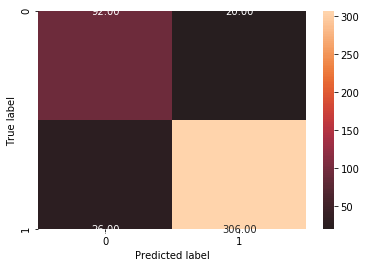



Linear SVM
accuracy score: 74.77
RMS error: 0.50
F1-score:  [0.   0.86]
precision score:  [0.   0.75]
confusion matrix:
+----------------------+-------------------+-----------------------+
| material/predictions | Predicted as skin | Predicted as Non-skin |
+----------------------+-------------------+-----------------------+
|         skin         |         0         |          112          |
|       Non-skin       |         0         |          332          |
+----------------------+-------------------+-----------------------+
run time: 0.06


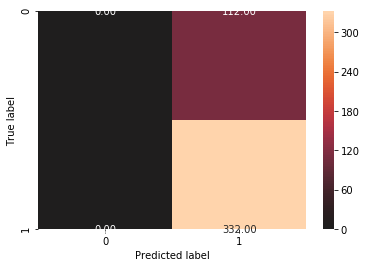



RBF SVM
accuracy score: 93.02
RMS error: 0.26
F1-score:  [0.84 0.96]
precision score:  [1.   0.91]
confusion matrix:
+----------------------+-------------------+-----------------------+
| material/predictions | Predicted as skin | Predicted as Non-skin |
+----------------------+-------------------+-----------------------+
|         skin         |         81        |           31          |
|       Non-skin       |         0         |          332          |
+----------------------+-------------------+-----------------------+
run time: 0.13


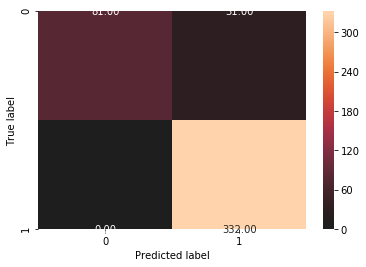



MLP Net
accuracy score: 93.02
RMS error: 0.26
F1-score:  [0.85 0.95]
precision score:  [0.94 0.93]
confusion matrix:
+----------------------+-------------------+-----------------------+
| material/predictions | Predicted as skin | Predicted as Non-skin |
+----------------------+-------------------+-----------------------+
|         skin         |         87        |           25          |
|       Non-skin       |         6         |          326          |
+----------------------+-------------------+-----------------------+
run time: 4.45


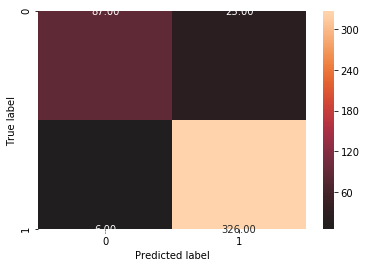



AdaBoost
accuracy score: 90.99
RMS error: 0.30
F1-score:  [0.81 0.94]
precision score:  [0.87 0.92]
confusion matrix:
+----------------------+-------------------+-----------------------+
| material/predictions | Predicted as skin | Predicted as Non-skin |
+----------------------+-------------------+-----------------------+
|         skin         |         85        |           27          |
|       Non-skin       |         13        |          319          |
+----------------------+-------------------+-----------------------+
run time: 0.27


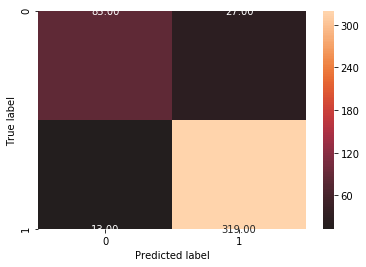

In [16]:
'''Training different classifiers'''

for name, clf in zip(names, classifiers):
    tic = time.time()
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    toc = time.time()
    print(name)
    print("accuracy score: %.2f"%(accuracy_score(y_test, pred)*100))
    print("RMS error: %.2f"%(np.sqrt(mean_squared_error(y_test, pred))))
    print("F1-score: ", np.around(f1_score(y_test, pred, average=None), 2))
    print('precision score: ',np.around(precision_score(y_test, pred, average=None), 2))
    print("confusion matrix:")
    matrix = confusion_matrix(y_test, pred)
    x1 = PrettyTable()
    x1.field_names = ['material/predictions','Predicted as skin', 'Predicted as Non-skin']
    x1.add_row(['skin',matrix[0][0],matrix[0][1]])
    x1.add_row(['Non-skin',matrix[1][0],matrix[1][1]])
    print(x1)
    sns.heatmap(matrix,annot=True, center=True,fmt="0.2f")#, linewidths=1,square=True)#, cmap='Blues_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print("run time: %.2f"% (toc-tic))
    plt.show()
    print('\n')
    

# Archive data:

In [17]:
'''Data input from archive folder for training'''

flesh_link = 'NN Spectral Estimation/Archiv/Fleisch.xls'
flesh = pd.read_excel(flesh_link)
flesh = flesh.dropna()

holz_link = 'NN Spectral Estimation/Archiv/Holz.xls'
holz = pd.read_excel(holz_link)
holz = holz.dropna()

leder_link = 'NN Spectral Estimation/Archiv/Leder.xls'
leder = pd.read_excel(leder_link)
leder = leder.dropna()

stoff_link = 'NN Spectral Estimation/Archiv/Stoff.xls'
stoff = pd.read_excel(stoff_link)
stoff = stoff.dropna()

skin_link = 'NN Spectral Estimation/Archiv/Referenz-Haut_6-Klassen.xls'
skin = pd.read_excel(skin_link)
skin = skin.dropna()

# Visualization of input data

Text(0.5, 0, 'Wavelength')

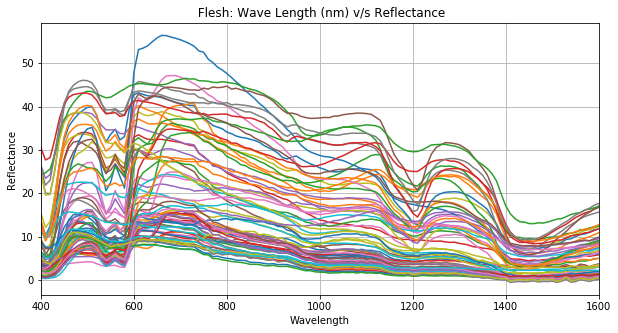

In [18]:
flesh[:].plot(x='nm', y = flesh.columns.drop('nm'), figsize=(10,5), grid=True,legend = False)
plt.title(" Flesh: Wave Length (nm) v/s Reflectance")
plt.ylabel('Reflectance')
plt.xlabel('Wavelength')

Text(0.5, 0, 'Wavelength')

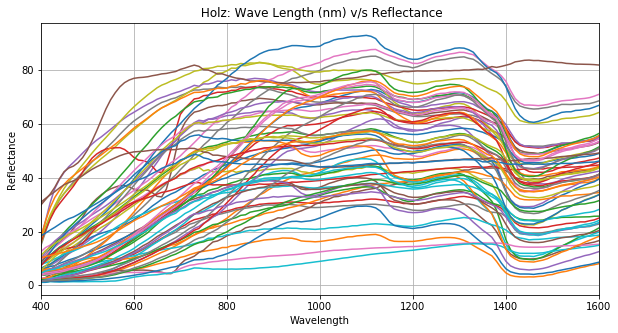

In [19]:
holz[:].plot(x='nm', y = holz.columns.drop('nm'), figsize=(10,5), grid=True,legend = False)
plt.title(" Holz: Wave Length (nm) v/s Reflectance")
plt.ylabel('Reflectance')
plt.xlabel('Wavelength')

Text(0.5, 0, 'Wavelength')

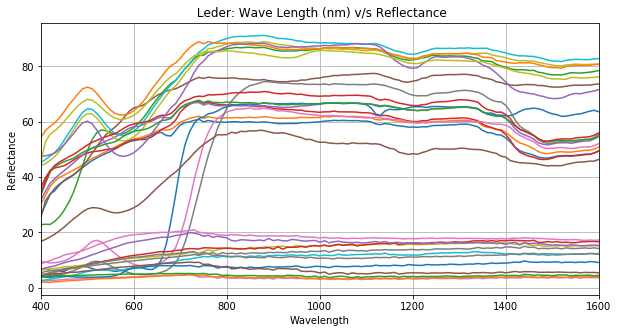

In [20]:
leder[:].plot(x='nm', y = leder.columns.drop('nm'), figsize=(10,5), grid=True,legend = False)
plt.title(" Leder: Wave Length (nm) v/s Reflectance")
plt.ylabel('Reflectance')
plt.xlabel('Wavelength')

Text(0.5, 0, 'Wavelength')

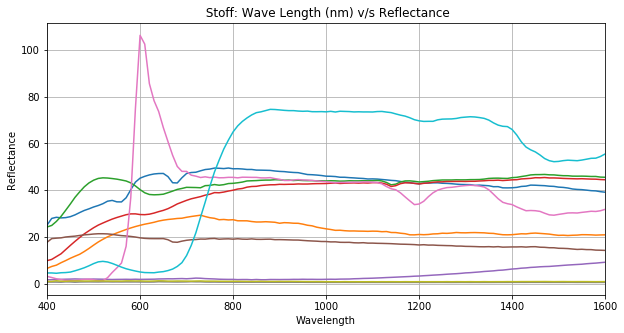

In [21]:
stoff[:].plot(x='nm', y = stoff.columns.drop('nm'), figsize=(10,5), grid=True,legend = False)
plt.title(" Stoff: Wave Length (nm) v/s Reflectance")
plt.ylabel('Reflectance')
plt.xlabel('Wavelength')

Text(0.5, 0, 'Wavelength')

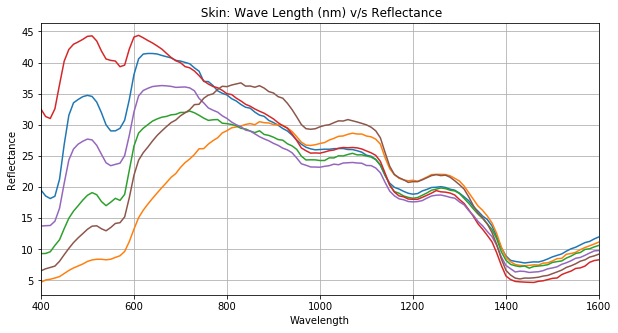

In [22]:
skin[:].plot(x='nm', y = skin.columns.drop('nm'), figsize=(10,5), grid=True,legend = False)
plt.title(" Skin: Wave Length (nm) v/s Reflectance")
plt.ylabel('Reflectance')
plt.xlabel('Wavelength')

In [23]:
'''Data preprocessing using MinMaxScaler from sklearn and 
feature selection using sklearn - chi2 and f_classif'''

flesh = flesh.transpose()
flesh.columns = flesh.iloc[0]
flesh = flesh.drop(flesh.index[0])
flesh_values = flesh.values
flesh_scaled = preprocessing.MinMaxScaler().fit_transform(flesh_values)
flesh_new = pd.DataFrame(flesh_scaled)
print("shape of flesh data:",flesh.shape)

holz = holz.transpose()
holz.columns = holz.iloc[0]
holz = holz.drop(holz.index[0])
holz_values = holz.values
holz_scaled = preprocessing.MinMaxScaler().fit_transform(holz_values)
holz_new = pd.DataFrame(holz_scaled)
print("shape of holz data:",holz.shape)

leder = leder.transpose()
leder.columns = leder.iloc[0]
leder = leder.drop(leder.index[0])
leder_values = leder.values
leder_scaled = preprocessing.MinMaxScaler().fit_transform(leder_values)
leder_new = pd.DataFrame(leder_scaled)
print("shape of leder data:",leder.shape)

stoff = stoff.transpose()
stoff.columns = stoff.iloc[0]
stoff = stoff.drop(stoff.index[0])
stoff_values = stoff.values
stoff_scaled = preprocessing.MinMaxScaler().fit_transform(stoff_values)
stoff_new = pd.DataFrame(stoff_scaled)
print("shape of stoff data:",stoff.shape)

skin = skin.transpose()
skin.columns = skin.iloc[0]
skin = skin.drop(skin.index[0])
skin_values = skin.values
skin_scaled = preprocessing.MinMaxScaler().fit_transform(skin_values)
skin_new = pd.DataFrame(skin_scaled)
print("shape of skin data:",skin.shape)

shape of flesh data: (70, 121)
shape of holz data: (62, 121)
shape of leder data: (29, 121)
shape of stoff data: (10, 121)
shape of skin data: (6, 121)


In [24]:

'''Creating new dataframes with the selected features and the assigned labels
Here data of flesh belongs to class 1 (label 1) and the rest of the data belongs to class 0 (label 0)'''

i=5
# flesh
new_f = np.ones((70, 1),int) #creating labels
flesh['label'] = new_f #adding label data to dataframe

fx = flesh.drop(['label'], axis=1)
fy = flesh['label']

FX_new = SelectKBest(f_classif, k=i).fit_transform(fx, fy) #selecting best features
print("shape of flesh data after feature selection:", FX_new.shape)

# holz
new_h = np.zeros((62, 1),int) #creating labels
holz['label'] = new_h #adding label data to dataframe

hx = holz.drop(['label'], axis=1)
hy = holz['label']

HX_new = SelectKBest(chi2, k=i).fit_transform(hx, hy) #selecting best features
print("shape of holz data after feature selection:", HX_new.shape)

# leder
new_l = np.zeros((29, 1),int) #creating labels
leder['label'] = new_l #adding label data to dataframe

lx = leder.drop(['label'], axis=1)
ly = leder['label']

LX_new = SelectKBest(chi2, k=i).fit_transform(lx, ly) #selecting best features
print("shape of leder data after feature selection:", LX_new.shape)

# stoff
new_s = np.zeros((10, 1),int) #creating labels
stoff['label'] = new_s #adding label data to dataframe

sx = stoff.drop(['label'], axis=1)
sy = stoff['label']

SX_new = SelectKBest(chi2, k=i).fit_transform(sx, sy) #selecting best features
print("shape of stoff data after feature selection:", SX_new.shape)

#haut
new_ha = np.ones((6, 1),int) #creating labels
skin['label'] = new_ha #adding label data to dataframe

hax = skin.drop(['label'], axis=1)
hay = skin['label']

HAX_new = SelectKBest(chi2, k=i).fit_transform(hax, hay) #selecting best features
print("shape of stoff data after feature selection:", new_ha.shape)

shape of flesh data after feature selection: (70, 5)
shape of holz data after feature selection: (62, 5)
shape of leder data after feature selection: (29, 5)
shape of stoff data after feature selection: (10, 5)
shape of stoff data after feature selection: (6, 1)


In [25]:
# column names - 5 best features - 5 wavelengths with most significant faetures.
col_names = ['nm1', 'nm2', 'nm3', 'nm4', 'nm5', 'label']

# # stacking for dataframe creation
fX = np.hstack((FX_new, np.ones((70, 1),int)))
hX = np.hstack((HX_new, np.zeros((62, 1),int)))
lX = np.hstack((LX_new, np.zeros((29, 1),int)))
sX = np.hstack((SX_new,  np.zeros((10, 1),int)))
haX = np.hstack((HAX_new, np.ones((6, 1),int)))

# #Dataframe creation along with column names
data_fX = pd.DataFrame(fX, columns=col_names)
data_hX = pd.DataFrame(hX, columns=col_names)
data_lX = pd.DataFrame(lX, columns=col_names)
data_sX = pd.DataFrame(sX, columns=col_names)
data_haX = pd.DataFrame(haX, columns=col_names)

# Dataframe with all data for training 
X_archive = pd.concat([data_fX, data_hX, data_lX, data_sX, data_haX], axis=0)
print("shape of the dataframe:", X_archive.shape)
X_archive.head()


shape of the dataframe: (177, 6)


,nm1,nm2,nm3,nm4,nm5,label
0,1.289522,1.252785,1.148140,1.462965,1.660357,1.0
1,0.572846,0.562300,0.463159,0.551957,0.689022,1.0
2,1.022003,0.880955,0.702155,0.986118,1.126980,1.0
3,5.492943,5.647113,5.469207,5.616057,5.809368,1.0
4,0.901779,0.901044,0.705852,0.902096,1.071004,1.0


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

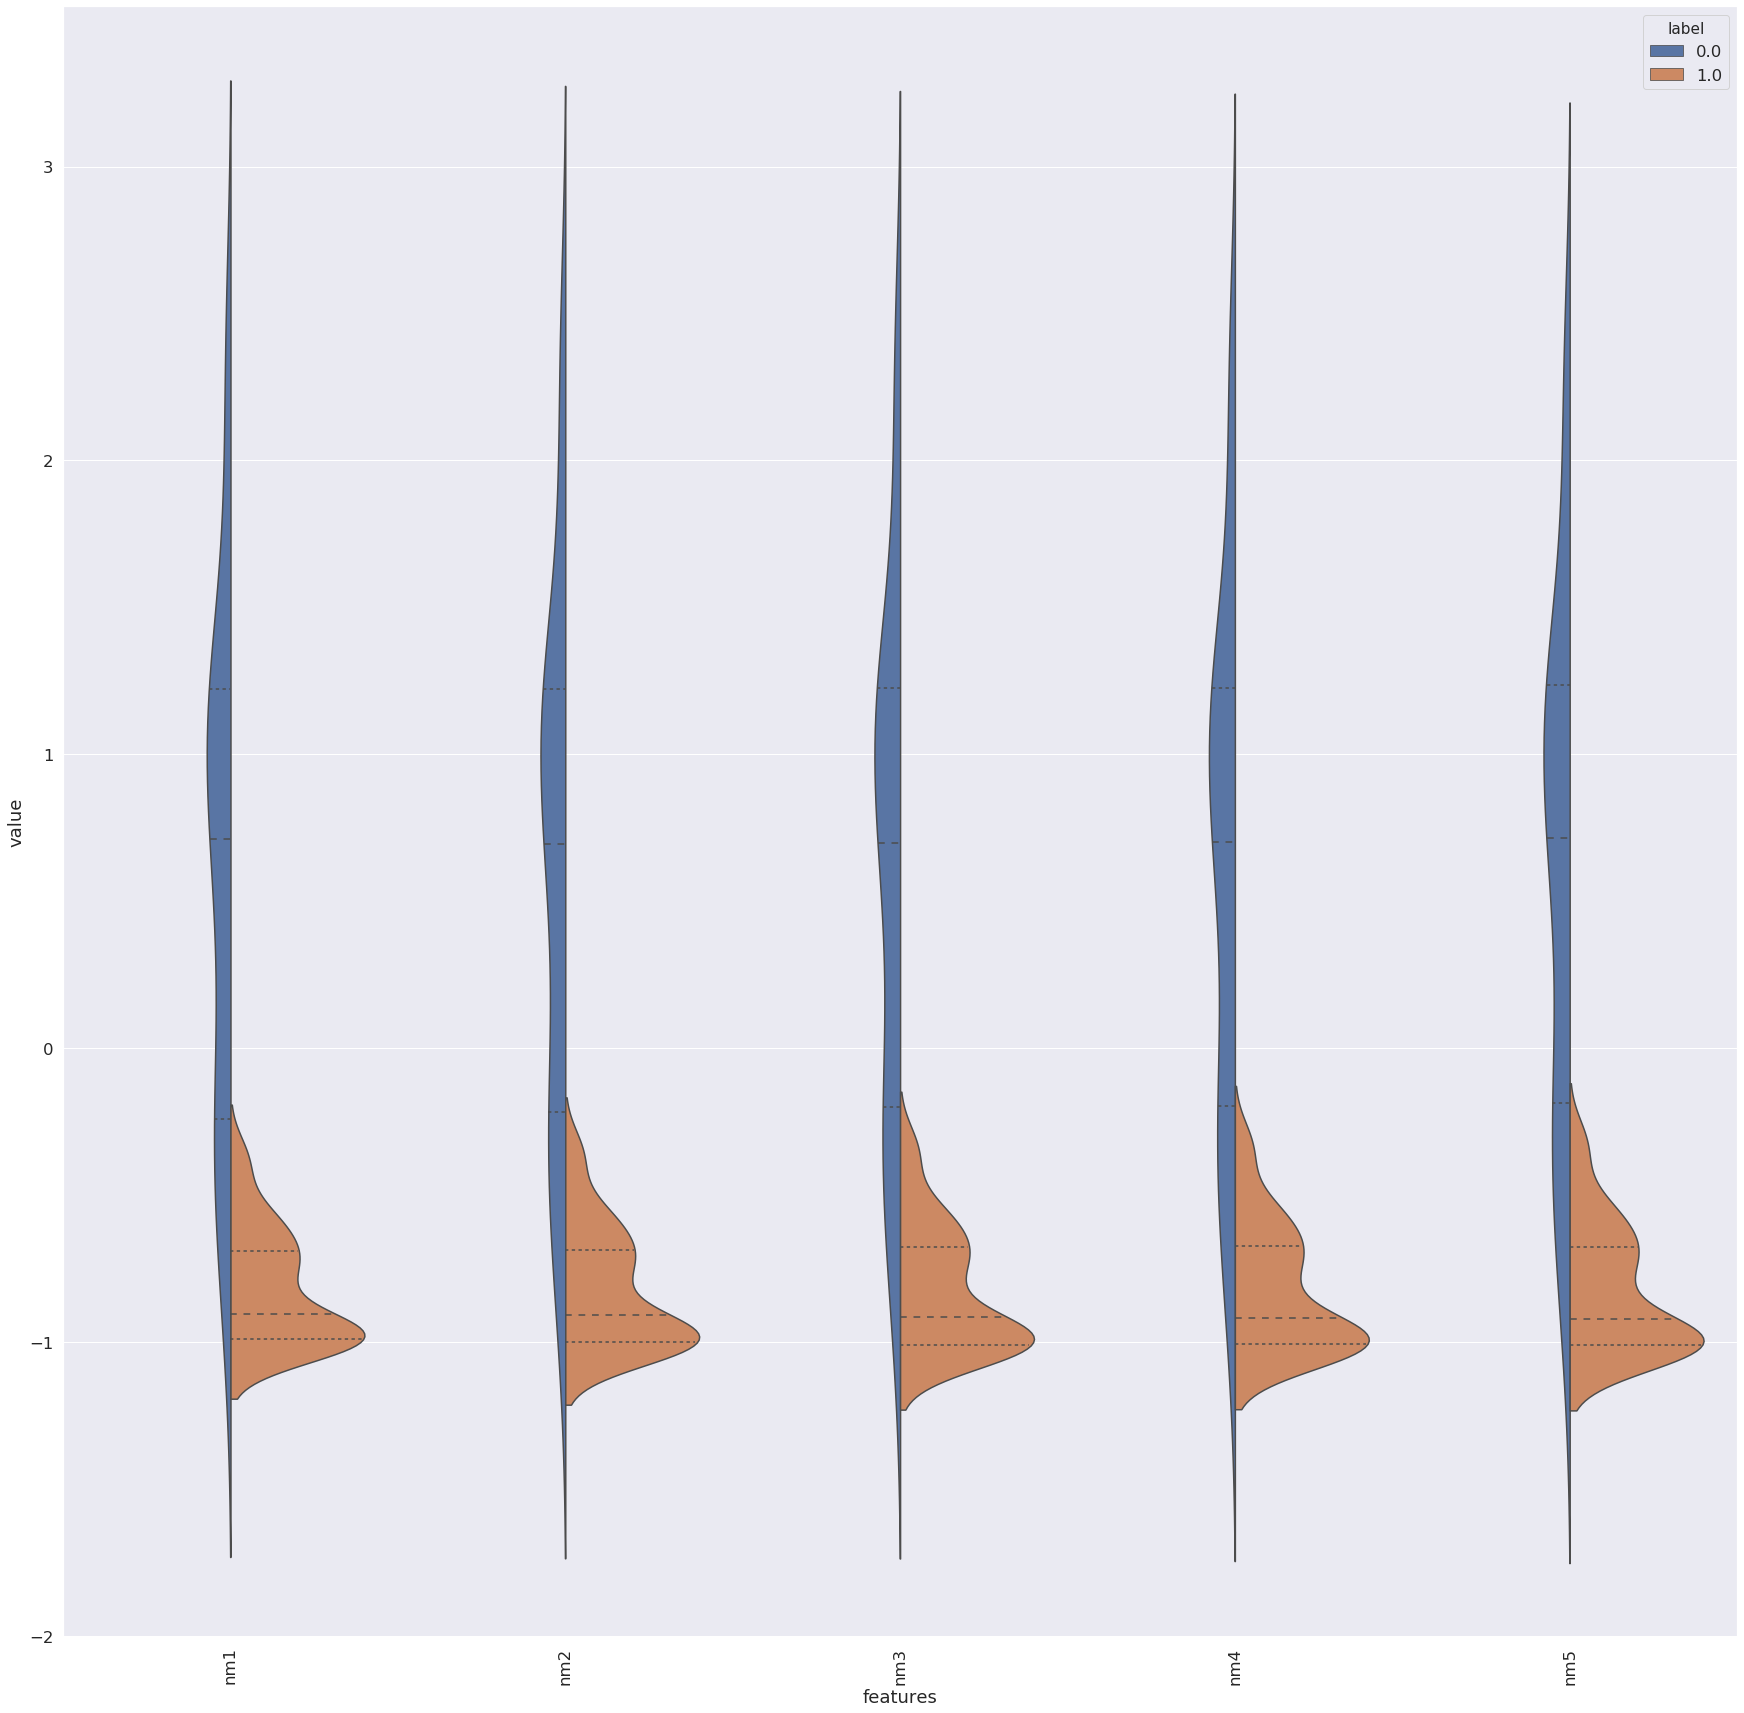

In [26]:
''' Visualization of the reduced dataframe'''

checky = X_archive.label
checkx = X_archive.drop(['label'], axis=1)
sns.set(font_scale=1.5)
data_dia = checky
data1 = checkx
data_n_2 = (data1 - data1.mean()) / (data1.std())              # standardization
data_n_2.head()
data1 = pd.concat([checky,data_n_2.iloc[:,0:30]],axis=1)
data1 = pd.melt(data1,id_vars="label",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(30,30))
sns.violinplot(x="features", y="value", hue="label", data=data1,split=True, inner="quart")
plt.xticks(rotation=90)

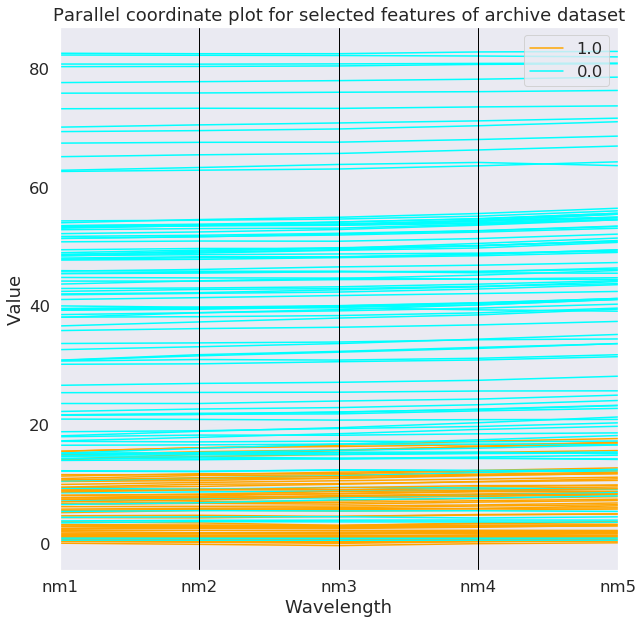

In [27]:
''' Visualization of the reduced dataframe - parallel coordinate'''

plt.figure(figsize=(10,10))
parallel_coordinates(X_archive,"label",color = ('orange','cyan'))
plt.title("Parallel coordinate plot for selected features of archive dataset")
plt.ylabel("Value")
plt.xlabel("Wavelength")
plt.show()

In [28]:
'''Creating training and testing data'''

target_1 = X_archive['label']
features_1 = X_archive.drop(['label'], axis=1)

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(features_1, target_1, test_size = 0.3, random_state=1)
print("shape of training features:",x_train_1.shape)
print("shape of training labels:",y_train_1.shape)
print("shape of test features:",x_test_1.shape)
print("shape of test labels:",y_test_1.shape)

shape of training features: (123, 5)
shape of training labels: (123,)
shape of test features: (54, 5)
shape of test labels: (54,)


K Nearest Neighbors
accuracy score: 83.33
RMS error: 0.41
F1-score:  [0.82 0.85]
precision score:  [0.95 0.76]
recall score:  [0.71 0.96]
confusion matrix:
+----------------------+-------------------+-----------------------+
| material/predictions | Predicted as skin | Predicted as Non-skin |
+----------------------+-------------------+-----------------------+
|         skin         |         20        |           8           |
|       Non-skin       |         1         |           25          |
+----------------------+-------------------+-----------------------+
run time: 0.01




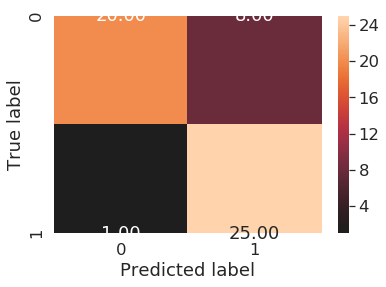

Linear SVM
accuracy score: 88.89
RMS error: 0.33
F1-score:  [0.88 0.9 ]
precision score:  [1.   0.81]
recall score:  [0.79 1.  ]
confusion matrix:
+----------------------+-------------------+-----------------------+
| material/predictions | Predicted as skin | Predicted as Non-skin |
+----------------------+-------------------+-----------------------+
|         skin         |         22        |           6           |
|       Non-skin       |         0         |           26          |
+----------------------+-------------------+-----------------------+
run time: 0.01




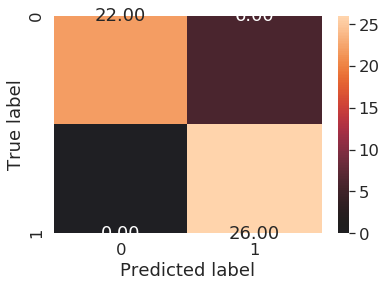

RBF SVM
accuracy score: 87.04
RMS error: 0.36
F1-score:  [0.86 0.88]
precision score:  [0.96 0.81]
recall score:  [0.79 0.96]
confusion matrix:
+----------------------+-------------------+-----------------------+
| material/predictions | Predicted as skin | Predicted as Non-skin |
+----------------------+-------------------+-----------------------+
|         skin         |         22        |           6           |
|       Non-skin       |         1         |           25          |
+----------------------+-------------------+-----------------------+
run time: 0.01




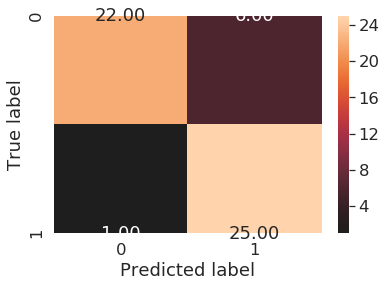

MLP Net
accuracy score: 51.85
RMS error: 0.69
F1-score:  [0.68 0.  ]
precision score:  [0.52 0.  ]
recall score:  [1. 0.]
confusion matrix:
+----------------------+-------------------+-----------------------+
| material/predictions | Predicted as skin | Predicted as Non-skin |
+----------------------+-------------------+-----------------------+
|         skin         |         28        |           0           |
|       Non-skin       |         26        |           0           |
+----------------------+-------------------+-----------------------+
run time: 0.03




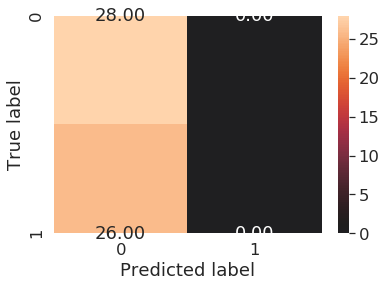

AdaBoost
accuracy score: 87.04
RMS error: 0.36
F1-score:  [0.86 0.88]
precision score:  [1.   0.79]
recall score:  [0.75 1.  ]
confusion matrix:
+----------------------+-------------------+-----------------------+
| material/predictions | Predicted as skin | Predicted as Non-skin |
+----------------------+-------------------+-----------------------+
|         skin         |         21        |           7           |
|       Non-skin       |         0         |           26          |
+----------------------+-------------------+-----------------------+
run time: 0.19




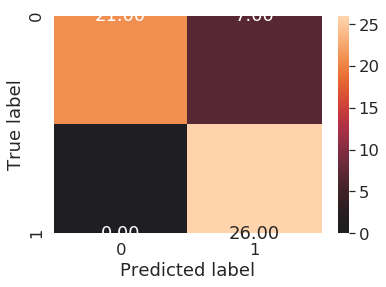

In [29]:
'''Training different classifiers'''

for name, clf in zip(names, classifiers):
    tic = time.time()
    clf.fit(x_train_1, y_train_1)
    pred_1 = clf.predict(x_test_1)
    toc = time.time()
    print(name)
    print("accuracy score: %.2f"%(accuracy_score(y_test_1, pred_1)*100))
    print("RMS error: %.2f"%(np.sqrt(mean_squared_error(y_test_1, pred_1))))
    print("F1-score: ", np.around(f1_score(y_test_1, pred_1, average=None), 2))
    print('precision score: ',np.around(precision_score(y_test_1, pred_1, average=None), 2))
    print('recall score: ', np.around(recall_score(y_test_1, pred_1, average=None), 2))
    print("confusion matrix:")
    matrix = confusion_matrix(y_test_1, pred_1)
    x1 = PrettyTable()
    x1.field_names = ['material/predictions','Predicted as skin', 'Predicted as Non-skin']
    x1.add_row(['skin',matrix[0][0],matrix[0][1]])
    x1.add_row(['Non-skin',matrix[1][0],matrix[1][1]])
    print(x1)
    sns.heatmap(matrix,annot=True, center=True,fmt="0.2f")#, linewidths=1,square=True)#, cmap='Blues_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print("run time: %.2f"% (toc-tic))
    print('\n')
    plt.show()

# Archive2016 data with TSNE:

In [36]:
'''Data input from archive2016 folder for training'''

dsl = 'NN Spectral Estimation/Archiv2016/2016skin.csv'
ds = pd.read_csv(dsl, sep=';', encoding='utf-8')
ds = ds.dropna()

fml = 'NN Spectral Estimation/Archiv2016/2016material-fake.csv'
dfm = pd.read_csv(fml, sep=';', encoding='utf-8')
dfm = dfm.dropna()

ml = 'NN Spectral Estimation/Archiv2016/2016material.csv'
dm = pd.read_csv(ml, sep=';', encoding='utf-8')
dm = dm.dropna()

In [37]:
'''Feature reduction using TSNE on Archive 2016 data'''

'''Data preprocessing using sklearn - MinmaxScaler and feature selection using PCA'''

ds = ds.transpose()
ds.columns = ds.iloc[0]
ds = ds.drop(ds.index[0])
values1 = ds.values
min_max_scaler1 = preprocessing.MinMaxScaler()
values1_scaled = min_max_scaler1.fit_transform(values1)
data_skin_ds = pd.DataFrame(values1_scaled)
print("shpae of skin data:",data_skin_ds.shape)

dfm = dfm.transpose()
dfm.columns = dfm.iloc[0]
dfm = dfm.drop(dfm.index[0])
values2 = dfm.values
min_max_scaler2 = preprocessing.MinMaxScaler()
values2_scaled = min_max_scaler2.fit_transform(values2)
data_fake_material_dfm = pd.DataFrame(values2_scaled)
print("shape for fake material data:",data_fake_material_dfm.shape)

dm = dm.transpose()
dm.columns = dm.iloc[0]
dm = dm.drop(dm.index[0])
values3 = dm.values
min_max_scaler3 = preprocessing.MinMaxScaler()
values3_scaled = min_max_scaler3.fit_transform(values3)
data_material_dm = pd.DataFrame(values3_scaled)
print("shape of material:",data_material_dm.shape)

# data skin
DS_tsne = TSNE(n_components=2).fit_transform(data_skin_ds)
print("shape of skin data after feature selection:", DS_tsne.shape)

# data fake material
DF_tsne = TSNE().fit_transform(data_fake_material_dfm)
print("shape of fake material data after feature selection:", DF_tsne.shape)

# data material
DM_tsne = TSNE().fit_transform(data_material_dm)
# LX_new = SelectKBest(chi2, k=i).fit_transform(lx, ly) #selecting best features
print("shape of material data after feature selection:", DM_tsne.shape)

shpae of skin data: (1111, 1021)
shape for fake material data: (32, 1021)
shape of material: (335, 1021)
shape of skin data after feature selection: (1111, 2)
shape of fake material data after feature selection: (32, 2)
shape of material data after feature selection: (335, 2)


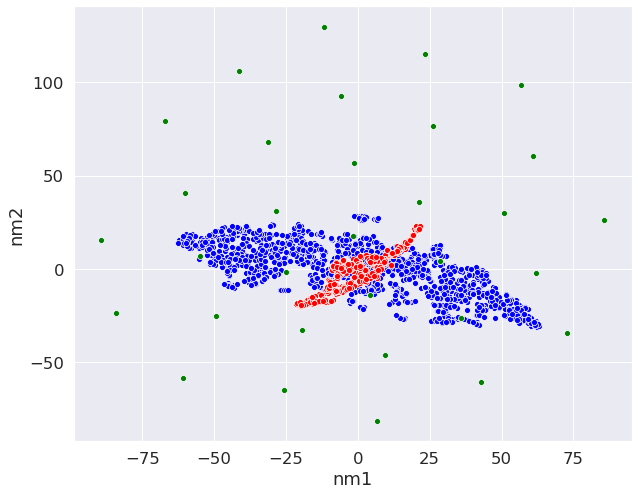

In [38]:
col_names = ['nm1', 'nm2']

pd_DS = pd.DataFrame(DS_tsne, columns=col_names)
pd_DF = pd.DataFrame(DF_tsne, columns=col_names)
pd_DM = pd.DataFrame(DM_tsne, columns=col_names)

plt.figure(figsize=(10,8))
sns.scatterplot(x="nm1", y="nm2", data=pd_DS, legend='brief', color='blue')
sns.scatterplot(x="nm1", y="nm2", data=pd_DF, legend='brief', color='green')
sns.scatterplot(x="nm1", y="nm2", data=pd_DM, legend='brief', color='red')

Shape of the dataframe: (1478, 3)


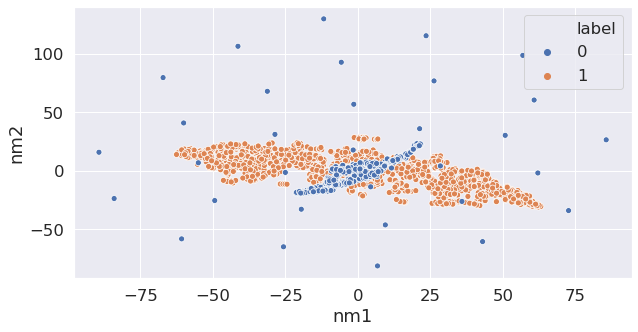

,nm1,nm2,label
0,0.451865,-10.911636,1
1,9.981394,-0.287832,1
2,-26.122635,4.767229,1
3,-27.836826,4.245380,1
4,-46.100269,2.165614,1


In [39]:
'''Creating new dataframes with the selected features and the assigned labels
Here data of skin belongs to class 1 (label 1) and the rest of the data belongs to class 0 (label 0)'''

#adding labels to the new dataframes.
pd_DS = pd_DS.copy()
pd_DS['label'] = np.ones((1111, 1),int)

pd_DF = pd_DF.copy()
pd_DF['label'] = np.zeros((32, 1),int)

pd_DM = pd_DM.copy()
pd_DM['label'] = np.zeros((335, 1),int)


#Creating a new data frame for training and testing of the classifiers.
X_archive2016_tsne = pd.concat((pd_DS, pd_DF, pd_DM), axis=0)
print("Shape of the dataframe:",X_archive2016_tsne.shape)


plt.figure(figsize=(10,5))
sns.scatterplot(x="nm1", y="nm2", hue='label', data=X_archive2016_tsne, legend='brief')
plt.show()

X_archive2016_tsne.head()

In [40]:
'''Creating training and testing data'''

target_tsne = X_archive2016_tsne['label'] #target labels
features_tsne = X_archive2016_tsne.drop('label', axis=1) #features for training

x_train_tsne, x_test_tsne, y_train_tsne, y_test_tsne = train_test_split(features_tsne, target_tsne, test_size = 0.3, random_state=1)
print("shape of training features:",x_train_tsne.shape)
print("shape of training labels:",y_train_tsne.shape)
print("shape of test features:",x_test_tsne.shape)
print("shape of test labels:",y_test_tsne.shape)

shape of training features: (1034, 2)
shape of training labels: (1034,)
shape of test features: (444, 2)
shape of test labels: (444,)


K Nearest Neighbors
accuracy score: 89.64
RMS error: 0.32
F1-score:  [0.79 0.93]
precision score:  [0.81 0.92]
confusion matrix:
+----------------------+-------------------+-----------------------+
| material/predictions | Predicted as skin | Predicted as Non-skin |
+----------------------+-------------------+-----------------------+
|         skin         |         86        |           26          |
|       Non-skin       |         20        |          312          |
+----------------------+-------------------+-----------------------+
run time: 0.04


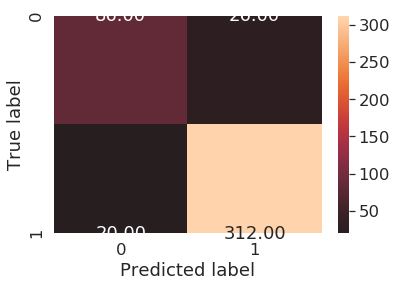



Linear SVM
accuracy score: 74.77
RMS error: 0.50
F1-score:  [0.   0.86]
precision score:  [0.   0.75]
confusion matrix:
+----------------------+-------------------+-----------------------+
| material/predictions | Predicted as skin | Predicted as Non-skin |
+----------------------+-------------------+-----------------------+
|         skin         |         0         |          112          |
|       Non-skin       |         0         |          332          |
+----------------------+-------------------+-----------------------+
run time: 594.94


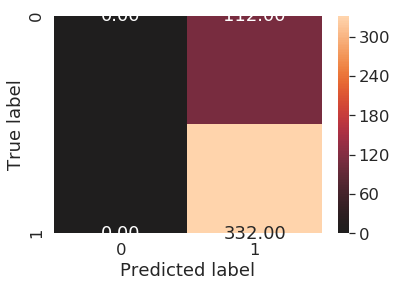



RBF SVM
accuracy score: 89.64
RMS error: 0.32
F1-score:  [0.79 0.93]
precision score:  [0.82 0.92]
confusion matrix:
+----------------------+-------------------+-----------------------+
| material/predictions | Predicted as skin | Predicted as Non-skin |
+----------------------+-------------------+-----------------------+
|         skin         |         85        |           27          |
|       Non-skin       |         19        |          313          |
+----------------------+-------------------+-----------------------+
run time: 0.10


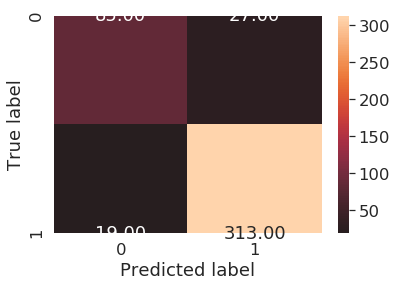



MLP Net
accuracy score: 85.36
RMS error: 0.38
F1-score:  [0.69 0.9 ]
precision score:  [0.74 0.88]
confusion matrix:
+----------------------+-------------------+-----------------------+
| material/predictions | Predicted as skin | Predicted as Non-skin |
+----------------------+-------------------+-----------------------+
|         skin         |         72        |           40          |
|       Non-skin       |         25        |          307          |
+----------------------+-------------------+-----------------------+
run time: 1.80


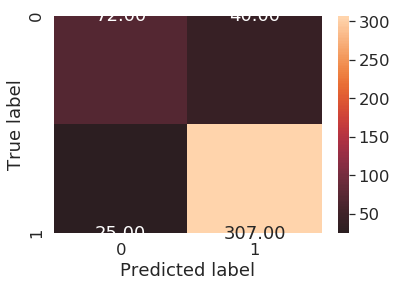



AdaBoost
accuracy score: 82.21
RMS error: 0.42
F1-score:  [0.59 0.89]
precision score:  [0.7  0.85]
confusion matrix:
+----------------------+-------------------+-----------------------+
| material/predictions | Predicted as skin | Predicted as Non-skin |
+----------------------+-------------------+-----------------------+
|         skin         |         57        |           55          |
|       Non-skin       |         24        |          308          |
+----------------------+-------------------+-----------------------+
run time: 0.18


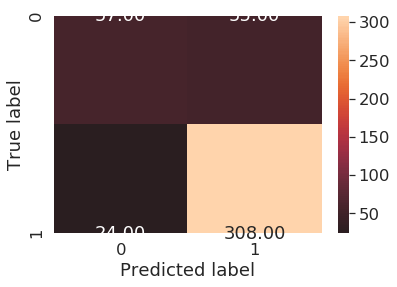

In [41]:
'''Training different classifiers'''

for name, clf in zip(names, classifiers):
    tic = time.time()
    clf.fit(x_train_tsne, y_train_tsne)
    pred_tsne = clf.predict(x_test_tsne)
    toc = time.time()
    print(name)
    print("accuracy score: %.2f"%(accuracy_score(y_test_tsne, pred_tsne)*100))
    print("RMS error: %.2f"%(np.sqrt(mean_squared_error(y_test_tsne, pred_tsne))))
    print("F1-score: ", np.around(f1_score(y_test_tsne, pred_tsne, average=None), 2))
    print('precision score: ',np.around(precision_score(y_test_tsne, pred_tsne, average=None), 2))
    print("confusion matrix:")
    matrix_tsne = confusion_matrix(y_test_tsne, pred_tsne)
    x1 = PrettyTable()
    x1.field_names = ['material/predictions','Predicted as skin', 'Predicted as Non-skin']
    x1.add_row(['skin',matrix_tsne[0][0],matrix_tsne[0][1]])
    x1.add_row(['Non-skin',matrix_tsne[1][0],matrix_tsne[1][1]])
    print(x1)
    sns.heatmap(matrix_tsne,annot=True, center=True,fmt="0.2f")#, linewidths=1,square=True)#, cmap='Blues_r')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    print("run time: %.2f"% (toc-tic))
    plt.show()
    print('\n')
    

In this implementation, we have analysed both the datasets - Archive and Archive2016 available in NN spectral estimation folder. Since the samples are available in a wide varied range of spectral lines (ie. in Archive dataset - nm from 400 to 1600 and in Archive2016 - nm 670 to 1690), there is a need to reduced the features.

$\textbf{Feature selection}$ can be achived in various ways, namely, PCA, LDA, select k best features from SKlearn using functions like chi2, f_classif,L1 based feature selection and tree based selection. In this implementation, PCA, chi2 and f_classif methods have been adapated to select the appropripate feature which best describe the dataset variation, thereby achieve maximum accuracy with various classifiers.

For archive dataset, it was determined that $\textit{5 best features lead maximum accuracy}$ while for archive2016 dataset, $\textit{15 best features lead to maximum accuracy.}$

With the selected features, the following /textbf{classifer} were implemented and accuracy was determined. The list of classifiers are:
* K Nearest Neighbors
* SVM Linear
* RBF SVM
* MLP
* AdaBoost

It was determined that, the classifer: $\textbf{MLP (accuracy score: 92.31 and run time: 0.56)}$  and $\textbf{SVM (accuracy score: 90.38 run time: 0.0012)}$ performed best for Archive dataset. While for the Archive2016 dataset, again $\textbf{MLP (accuracy score: 93.92 and run time: 0.466)}$  and $\textbf{SVM (accuracy score: 93.02 run time: 0.08)}$.

| Data | Classifiers/Scores | Accuracy(%) | Precision | F1-score | Runtime(s) | RMS error |
| --- | --- | --- | --- | --- | --- | --- |
|     | K-Neighbur | 89.85 | [0.83 0.92] | [0.78 0.93] | 0.03 | 0.32 |
|     | SVM Linear | 75.72 | [0.   0.76] | [0.   0.86] | 0.04 | 0.49 |
|Archive 2016 | SVM RBF | 88.96 | [0.91 0.89] | [0.73 0.93] | 0.09 | 0.33 |
|     | MLP | 89.62 | [0.88 0.9 ] | [0.76 0.93] | 2.36 | 0.32 |
|     | Adaboost | 78.15 | [0.58 0.82] | [0.44 0.86] | 0.18 | 0.47 |
| --- | --- | --- | --- | --- | --- | --- |
|     | K-Neighbur | 83.33 | [0.95 0.76] | [0.82 0.85] | 0.01 | 0.41 |
|     | SVM Linear | 88.89 | [1.   0.81] | [0.88 0.9 ] | 0.00 | 0.33 |
|Archive | SVM RBF | 87.04 | [0.96 0.81] | [0.86 0.88] | 0.00 | 0.36 |
|     | MLP | 90.74 | [1.   0.84] | [0.9  0.91] | 0.68 | 0.30 |
|     | Adaboost | 85.19 | [0.95 0.78] | [0.84 0.86] | 0.10 | 0.38 |
| --- | --- | --- | --- | --- | --- | --- |
|     | K-Neighbur | 81.46 | [0.61 0.89] | [0.63 0.88] | 0.02 | 0.43 |
|     | SVM Linear | 75.72 | [0.   0.76] | [0.   0.86] | 844.19 | 0.49 |
|Archive 2016 TSNE | SVM RBF | 84.55 | [0.69 0.89] | [0.67 0.9 ] | 0.10 | 0.39 |
|     | MLP | 79.03 | [0.59 0.83] | [0.5  0.87] | 4.17 | 0.46 |
|     | Adaboost | 82.78 | [0.65 0.89] | [0.65 0.89] | 0.15 | 0.41 |

Authors:

Shravanthi Arvind Patil. <br>
Sreenivasa Hikkal Venugopala